In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## Loading the data using pandas
df = pd.read_csv('netflix_titles.csv')

In [4]:
## Data cleaning
df = df.dropna(subset=['type','release_year','rating','country','duration'])

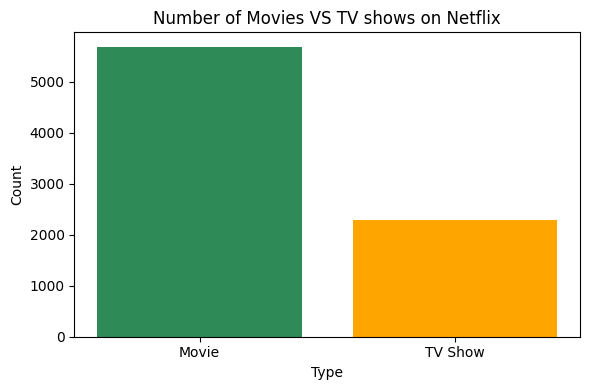

In [11]:
## Comparing number of movies and tv shows using bar graphs
type_counts = df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values, color=['seagreen', 'orange'])
plt.title('Number of Movies VS TV shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png')

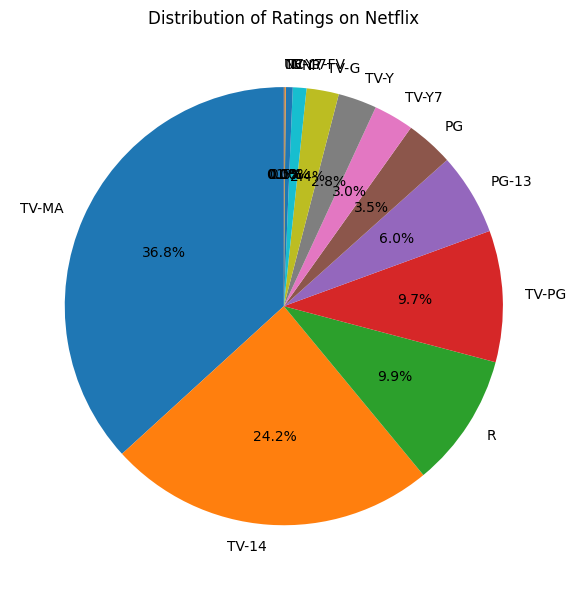

In [12]:
## Comparing ratings distribution using pie chart
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts,labels = rating_counts.index, autopct = '%1.1f%%', startangle = 90)
plt.title('Distribution of Ratings on Netflix')
plt.tight_layout()
plt.savefig('ratings_distribution.png')

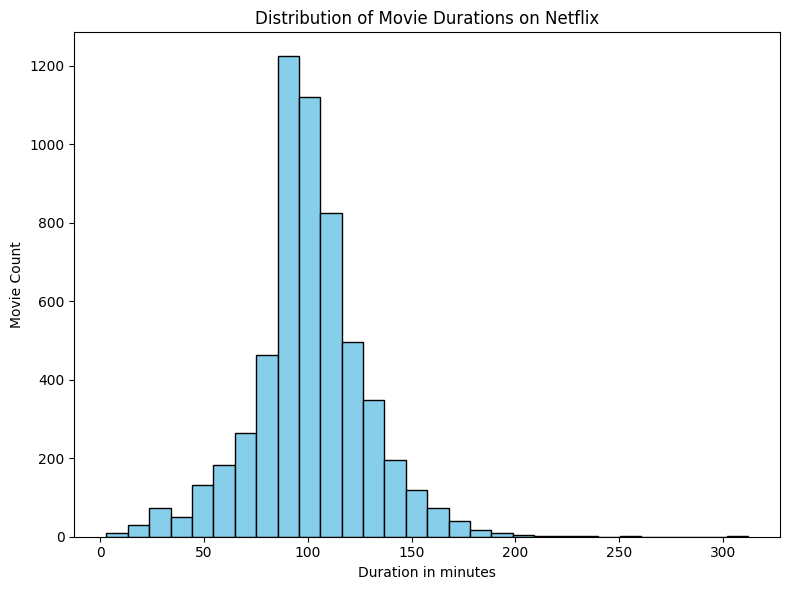

In [15]:
##Checking the distribution of movies using histograms

movies_df = df[df['type'] == 'Movie'].copy()
movies_df['duration_int'] = movies_df['duration'].str.replace(' min', '').astype(int)
plt.figure(figsize=(8,6))
plt.hist(movies_df['duration_int'],bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration in minutes')
plt.ylabel('Movie Count')
plt.tight_layout()
plt.savefig('movie_durations_distribution.png')

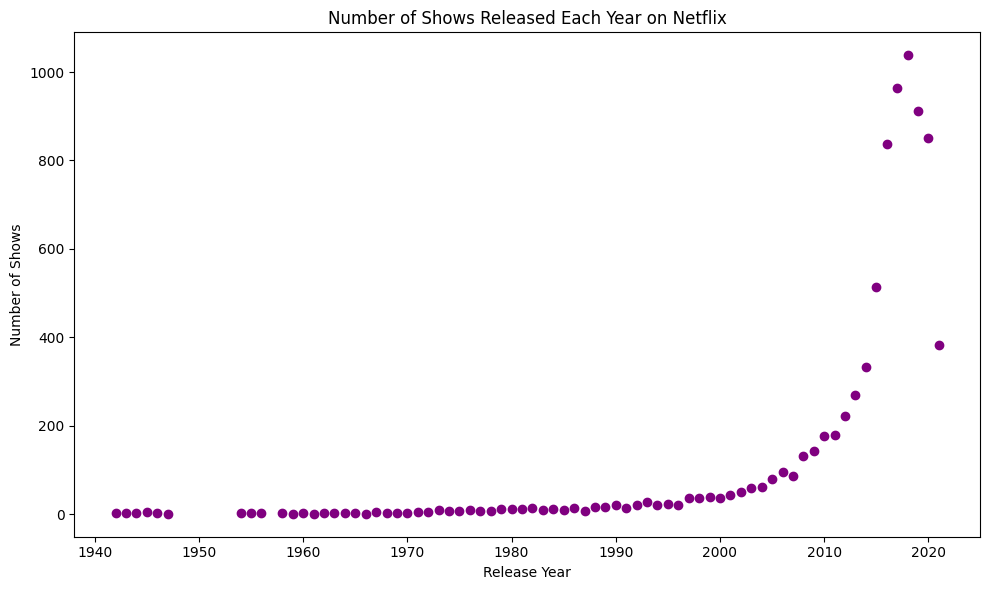

In [17]:
## Realease year vs number of shows

release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index, release_counts.values, color='purple',marker = 'o', label='Number of Shows')
plt.title('Number of Shows Released Each Year on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.savefig('release_year_vs_shows.png')

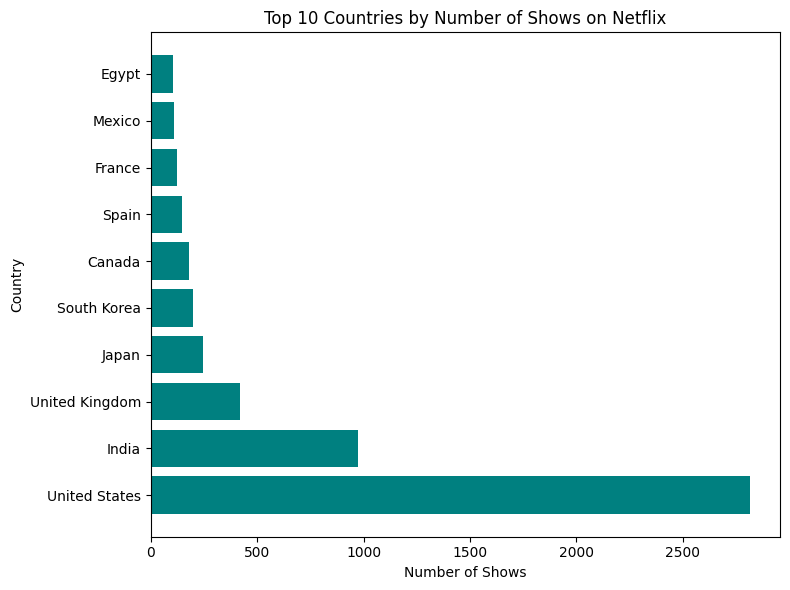

In [18]:
## Top 10 countires by number of shows
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index,country_counts.values, color = 'teal')
plt.title('Top 10 Countries by Number of Shows on Netflix')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('top_10_countries_by_shows.png')

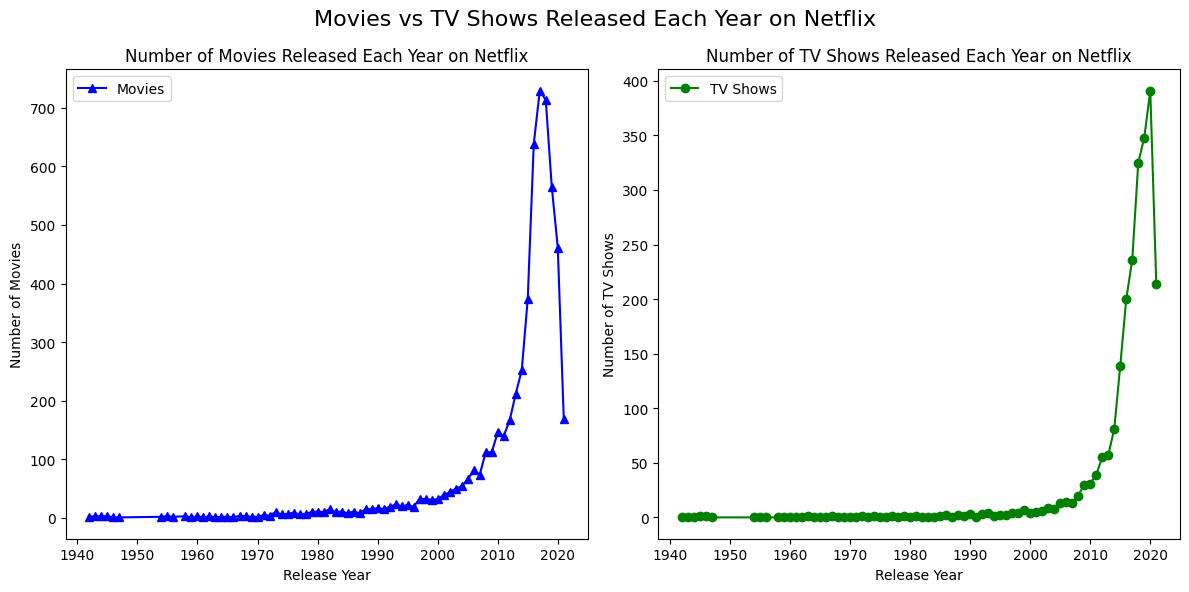

In [20]:
## Subplot of movie vs tv shows per year

content_by_year = df.groupby(['release_year','type']).size().unstack().fillna(0)

fig,ax = plt.subplots(1,2,figsize=(12,6))

ax[0].plot(content_by_year.index, content_by_year['Movie'], color='blue', marker='^', label='Movies')
ax[0].set_title('Number of Movies Released Each Year on Netflix')
ax[0].set_xlabel('Release Year')
ax[0].set_ylabel('Number of Movies')
ax[0].legend()

ax[1].plot(content_by_year.index, content_by_year['TV Show'], color='green', marker='o', label='TV Shows')
ax[1].set_title('Number of TV Shows Released Each Year on Netflix')
ax[1].set_xlabel('Release Year')
ax[1].set_ylabel('Number of TV Shows')
ax[1].legend()
fig.suptitle('Movies vs TV Shows Released Each Year on Netflix', fontsize=16)
plt.tight_layout()
plt.savefig('movies_vs_tvshows_per_year.png')